## `CSI` & `LPIPS` / timestep (`t`) for Model forecasts.

* The aim of this notebook is to plot the IRP plots of CSI and LPIPS scores per timestep.
* the data is read from the .csv files outputted from the eval NBs. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# ** read in the data **

files = [
    "eval_metrics/csi2.csv",
    "eval_metrics/csi10.csv",
    "eval_metrics/csi18.csv",
    "eval_metrics/lpips.csv",
]
dataframes = [pd.read_csv(file) for file in files]

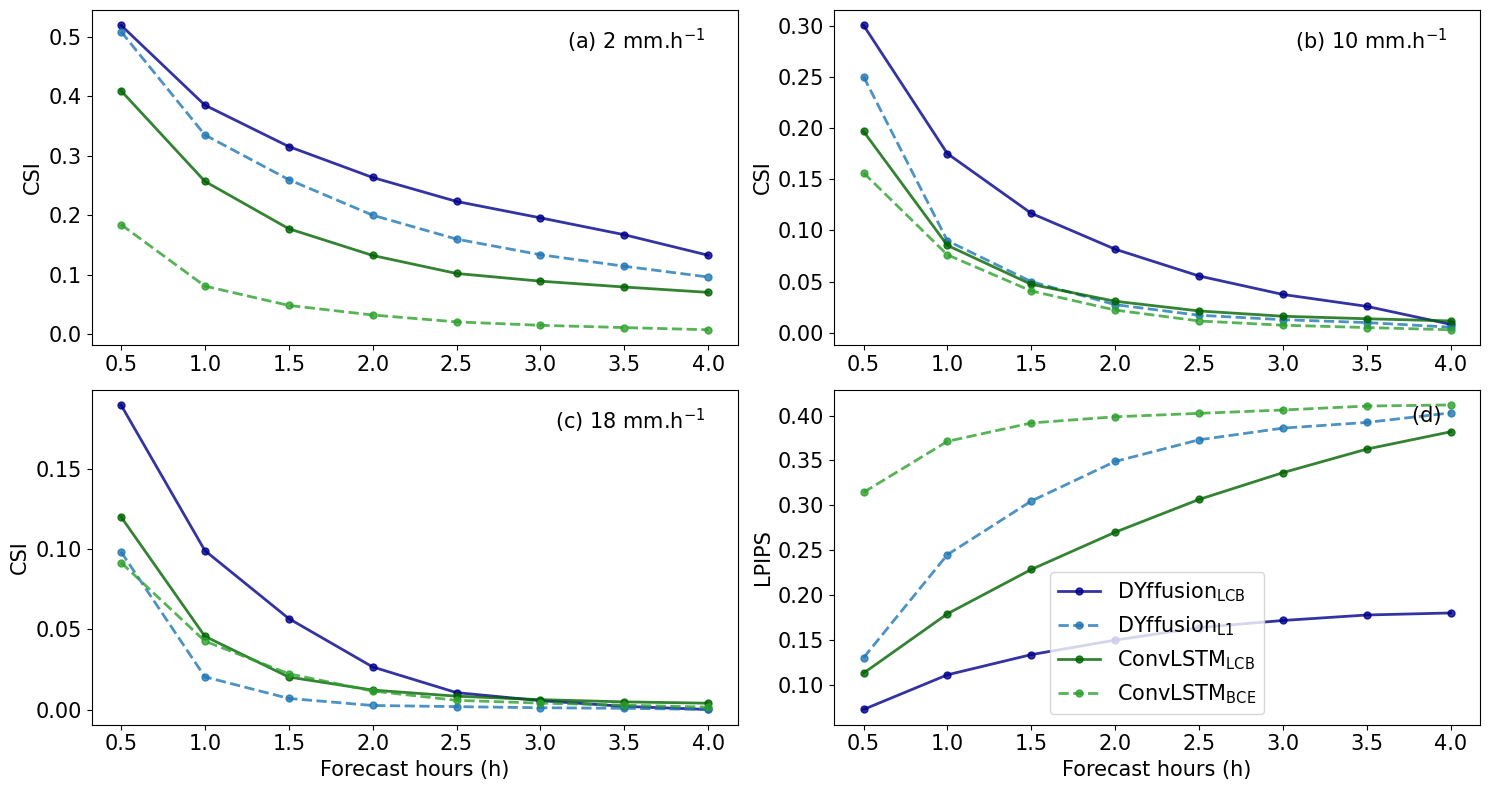

In [3]:
# plot params.
colors = ["darkblue", "C0", "darkgreen", "C2"]
linestyles = ["-", "--", "-", "--"]
metrics = ["CSI", "CSI", "CSI", "LPIPS"]
metric_labels = [r"2 mm.h$^{-1}$", r"10 mm.h$^{-1}$", r"18 mm.h$^{-1}$", ""]
labels = [
    r"DYffusion$_{\text{LCB}}$",
    r"DYffusion$_{\text{L1}}$",
    r"ConvLSTM$_{\text{LCB}}$",
    r"ConvLSTM$_{\text{BCE}}$",
]

fig, axs = plt.subplots(2, 2, figsize=(15, 8))
for i, (ax, df) in enumerate(zip(axs.flat, dataframes)):
    for j, (_, row) in enumerate(df.iterrows()):
        ax.plot(
            df.columns[1:],
            row[1:],
            marker="o",
            markersize=5,
            label=labels[j],  # row['model'],
            color=colors[j],
            linestyle=linestyles[j],
            alpha=0.8,
            linewidth=2,
        )
    if i >= 2 != 0:
        ax.set_xlabel("Forecast hours (h)", fontsize=15)
    ax.set_ylabel(f"{metrics[i]}", fontsize=15)

    if i == len(dataframes) - 1:
        ax.legend(loc="best", fontsize=15)

    # Set x-ticks to match the original plot
    ax.set_xticks(range(0, 8))
    ax.set_xticklabels([f"{x/2:.1f}" for x in range(1, 9)], fontsize=15)
    ax.tick_params(axis="y", labelsize=15)

    # Remove grid
    ax.grid(False)

    ax.text(
        0.95,
        0.95,
        f"({chr(97+i)}) {metric_labels[i]}",
        transform=ax.transAxes,
        fontsize=15,
        va="top",
        ha="right",
    )

plt.subplots_adjust(**{"wspace": 0.1, "hspace": 0.1})
plt.tight_layout()

### END OF SCRIPT.